In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))

0.9736842105263158


In [16]:
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

In [17]:
kf

sklearn.cross_validation.KFold(n=25, n_folds=5, shuffle=False, random_state=None)

In [18]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [19]:
print(scores.mean())

0.9666666666666668


In [24]:
k_range = list(range(1, 30))
accuracys = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    accuracys.append(scores.mean())
print (accuracys)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

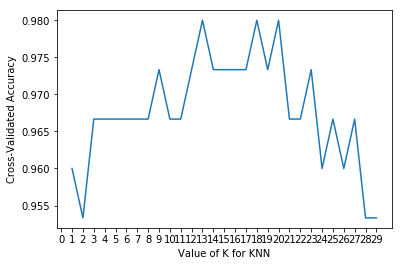

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, accuracys)
plt.xticks(list(range(30)))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Cross-validation example: feature selection

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [39]:
# read data
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [47]:
feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]
y = data.sales

In [51]:
linreg = LinearRegression()
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]
